# Análise Exploratória de Dados - German Risk Credit Dataset

## Introdução

<img src="https://static.tildacdn.com/tild6237-3363-4339-a563-393632306632/istockphoto-11521639.jpg" width="400">

O dataset a ser explorado se trata de um conjunto de dados com o perfil de clientes que solicitaram empréstimo de um banco alemão.

Quando o banco recebe uma proposta de empréstimo, precisa decidir se aprova ou não esse empréstimo. Existem dois tipos de riscos que o banco corre nesse tipo de validação:

1) Se o solicitante é um adimplente, ou seja, se é muito provável que ele pague a dívida, então não aprovar o empréstimo resulta em perda financeira para o banco.

2) Se o solicitante é um inadimplente, ou seja, se é muito provável que ele não pague a dívida, então aprovar o empréstimo rsulta em perda financeira para o banco.

Existe uma classificação no próprio dataset informando se aquele perfil é um bom pagador ou não ("Creditability"). Porém, não se sabe se é uma classificação feita pelos gerentes do banco, ou se é o resultado final do empréstimo, a fonte do dataset não deixa isso claro.

De qualquer forma, vamos explorar os dados ...



## Descrição da Base de Dados

In [8]:
# Carregando as bibliotecas necessárias para o processamento
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Carregando o dataset na memória
df = pd.read_csv('german_credit.csv')

In [10]:
#Verificando as colunas
df.info()
print('\nDuplicatas ? ->', df.duplicated()[df.duplicated() == True])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

>Podemos verificar que existem 21 colunas no dataset sendo 1 dessas colunas a classificação de crédito e 1000 linhas.
Ou seja, temos 1000 perfis de clientes, 20 caracterísiticas distintas e nenhum cliente com valor nulo em alguma característica.

>Também não possuímos nenhuma duplicata.

In [11]:
# Dando uma olhada nos valores das caracterísitcas
pd.concat([df.head(), df.tail()])

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1
999,0,1,30,2,2,6350,5,5,4,3,...,4,2,31,3,2,1,3,1,1,1


>Pelo nome das colunas, existem valores em que seria esperado uma descrição, ou valor descritivo ao invés de um inteiro representativo. Felizmente, em uma das fontes do dataset é possível encontrar um dicionário com a relação entre o valor inteiro e o que ele representa, conforme pode ser visualizado a seguir:

<div align="center">
    <img src="dictionary.png" width="800" align="middle">
</div>

## Processamento

Algumas características são de maior interesse na nossa análise do que outras, portanto, vamos transformar o dado representativo para o descritivo em algumas características para uma melhor visualização posterior. 

O dataset não possuem duplicatas nem valores nulos a serem tratados. 

In [58]:
df['Gender'] = df['Sex & Marital Status'].map({1: 'Male', 2: 'Male', 3: 'Male', 4: 'Female'})
df['Credit Analysis'] = df['Creditability'].map({0: 'Bad Credit', 1: 'Good Credit'})
df['Purpose_label'] = df['Purpose'].map({1: 'New car', 2: 'Used car', 3: 'Furniture', 4: 'Radio/TV', 5: 'Home appliances',
                  6: 'Repairs', 7: 'Education', 8: 'Vacations', 9: 'Recycling', 10: 'Business admin', 0: 'Other'})

age_bins = [0, 25, 39, 59, 64, 100]
age_labels = ['0 <=...<= 25', '26<=...<39', '40<=...<=59', '60<=...<=64', '>=65']
df['Age Group'] = pd.cut(df['Age (years)'], bins=age_bins, labels=age_labels)

balance_labels = ['No account', '< 0 DM', '0 <=...<= 200 DM', '> 200 DM']
df['Balance'] = df['Account Balance'].map({1: 'No account', 2: '< 0 DM', 3: '0 <=...<= 200 DM', 4: '> 200 DM'})

df[['Credit Analysis','Gender','Age Group','Purpose_label', 'Balance']].head(10)

,Credit Analysis,Gender,Age Group,Purpose_label,Balance
0,Good Credit,Male,0 <=...<= 25,Used car,No account
1,Good Credit,Male,26<=...<39,Other,No account
2,Good Credit,Male,0 <=...<= 25,Recycling,< 0 DM
3,Good Credit,Male,26<=...<39,Other,No account
4,Good Credit,Male,26<=...<39,Other,No account
5,Good Credit,Male,40<=...<=59,Other,No account
6,Good Credit,Male,26<=...<39,Other,No account
7,Good Credit,Male,40<=...<=59,Other,No account
8,Good Credit,Male,>=65,Furniture,> 200 DM
9,Good Credit,Male,0 <=...<= 25,Furniture,< 0 DM


## Análise Exploratória

A principal característica de cada solicitante no dataset é se ele é considerado adimplente ou inadimplente, vamos verificar qual é a proporção dentre essas opções.

In [13]:
print(df['Credit Analysis'].unique()) # Confirma que só existem 2 tipos de perfil de crédito, o bom pagador e o não pagador
good = (df['Credit Analysis'] == 'Good Credit').sum()
bad = 1000 - good #Sabe-se pela descrição da base de dados que 1000 é o total de perfis
print('Proporções de perfil de crédito:')
print(f'Adimplentes: {((good/1000)*100):.2f} %')
print(f'Inadimplentes: {((bad/1000)*100):.2f} %')

['Good Credit' 'Bad Credit']
Proporções de perfil de crédito:
Adimplentes: 70.00 %
Inadimplentes: 30.00 %


> Na categoria de gênero, existem 3 representações diferentes para homens e uma para mulher. Provavelmente existam mais homens que mulheres no dataset, vamos conferir as proporções:

In [14]:
print(df['Gender'].unique()) #Confirma que só existem 2 gêneros diferentes no dataset

male_count = (df['Gender'] == 'Male').sum()
female_count = 1000 - male_count
print('Proporções de gênero na base:')
print(f'Homens: {((male_count/1000)*100):.2f} %')
print(f'Mulheres: {((female_count/1000)*100):.2f} %')

['Male' 'Female']
Proporções de gênero na base:
Homens: 90.80 %
Mulheres: 9.20 %


> De fato, as proporção de mulheres é bem inferior ao dos homens no dataset. Porque será ? Seria essa proporção um recorte não representativo ou um indicativo, no período desconhecido contemplado pelo dataset, de que mulheres solicitam menos emprestimo do que os homens ? Não é possível responder essas perguntas, mas já que estamos falando de gênero e de análise de crédito, uma pergunta naturalmente surge... qual gênero tem mais perfis adimplentes e inadimplentes ? Vamos verificar !

In [15]:
gc_male = ((df['Gender'] == 'Male') & (df['Credit Analysis'] == 'Good Credit')).sum()
gc_female = ((df['Gender'] == 'Female') & (df['Credit Analysis'] == 'Good Credit')).sum()

print('Proporção de adimplentes por gênero:')
print(f'Homens: {((gc_male/male_count)*100):.2f} %')
print(f'Mulheres: {((gc_female/female_count)*100):.2f} %')

Proporção de adimplentes por gênero:
Homens: 69.71 %
Mulheres: 72.83 %


> Apesar de uma leve diferença positiva no número de adimplentes do gênero feminino, dado a diferença entre a quantidade de registros de ambos os gêneros, é uma diferença muito baixa para concluir que as mulheres no geral vão sempre ser pagadoras melhores que os homens, o que se pode dizer é que as mulheres registradas no dataset possuem proporcionalmente mais quantidades de adimplentes que os homens.

> Agora, vamos dar uma olhada nos propósitos pelos quais as pessoas tomam crédito e quais suas relações com gênero e adimplencia.

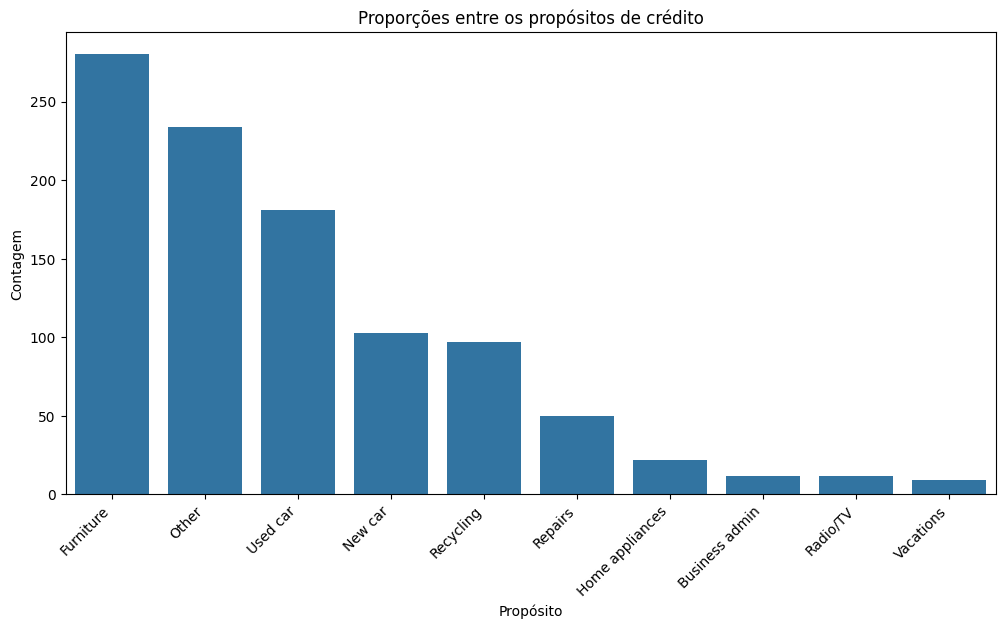

In [16]:
# Plotando as proporções dos propósitos
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Purpose_label', order=df['Purpose_label'].value_counts().index)
plt.title('Proporções entre os propósitos de crédito')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Contagem')
plt.xlabel('Propósito')
plt.show()

In [17]:
top3_purposes = df['Purpose_label'].isin(['Furniture', 'Other', 'Used car']).sum()
print(f'Proporção do top 3: {((top3_purposes/1000)*100):.2f} %')

Proporção do top 3: 69.50 %


> Dentre os propósitos pelos quais as pessoas do dataset tomam crédito, os 3 primeiros correspondem a quase 70% dos motivos registrados, sendo eles: Mobília, Outros, e Carro Usado. O propósito 'Outro' deve englobar vários motivos pelos quais não correspondem a nenhuma das outras opções, o que indica uma grande variedade de motivos além dos presentes no dataset. Nota-se também, fato curioso, que existem mais tomadores de crédito para adquirir um carro usado do que um novo.

> Será que a proporção desses motivos mudam em relação ao gênero do tomador de crédito ? Vamos verificar

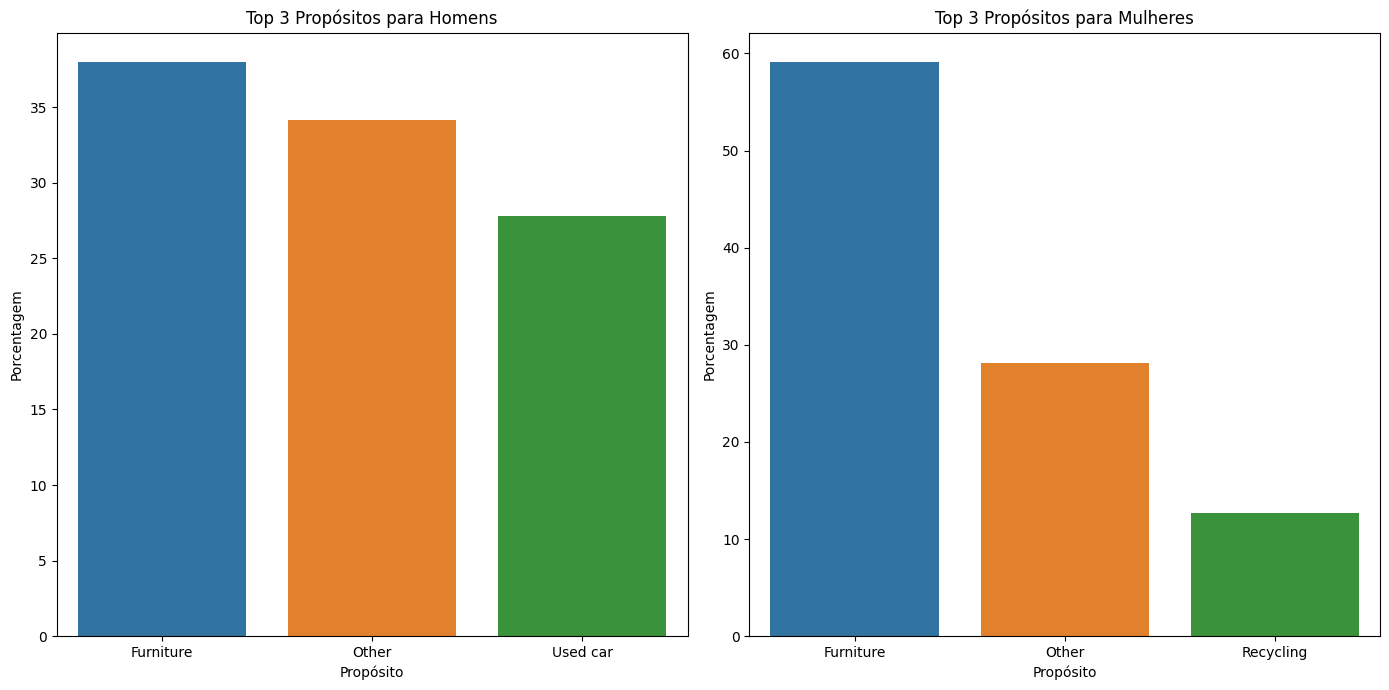

In [48]:
# Filtrar os top 3 propósitos para cada gênero
top_male_purposes = df[df['Gender'] == 'Male']['Purpose_label'].value_counts().nlargest(3).index
top_female_purposes = df[df['Gender'] == 'Female']['Purpose_label'].value_counts().nlargest(3).index

# Criar uma série booleana para identificar as linhas com os propósitos mais comuns por sexo
top_male_filter = df['Purpose_label'].isin(top_male_purposes) & (df['Gender'] == 'Male')
top_female_filter = df['Purpose_label'].isin(top_female_purposes) & (df['Gender'] == 'Female')

# Filtrar o DataFrame usando a série booleana
top_male_rows = df.loc[top_male_filter]
top_female_rows = df.loc[top_female_filter]

# Calcular as porcentagens para homens
male_counts = top_male_rows['Purpose_label'].value_counts(normalize=True) * 100
male_percentages = male_counts.reset_index()
male_percentages.columns = ['Purpose_label', 'Percentage']

# Calcular as porcentagens para mulheres
female_counts = top_female_rows['Purpose_label'].value_counts(normalize=True) * 100
female_percentages = female_counts.reset_index()
female_percentages.columns = ['Purpose_label', 'Percentage']

# Gráfico lado a lado dos top 3 propósitos para homens e mulheres
plt.figure(figsize=(14, 7))

# Gráfico para homens
plt.subplot(1, 2, 1)
sns.barplot(data=male_percentages, x='Purpose_label', y='Percentage', hue='Purpose_label')
plt.title('Top 3 Propósitos para Homens')
plt.xlabel('Propósito')
plt.ylabel('Porcentagem')

# Gráfico para mulheres
plt.subplot(1, 2, 2)
sns.barplot(data=female_percentages, x='Purpose_label', y='Percentage', hue='Purpose_label')
plt.title('Top 3 Propósitos para Mulheres')
plt.xlabel('Propósito')
plt.ylabel('Porcentagem')

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

> Como pode ser visto, os dois primeiros própositos se mantém, mas para mulheres móveis ocupam uma porcentagem de quase que o dobro do que para homens, e reciclagem está acima de comprar carros usados.

> Mas e comparando os própositos de adimplentes e inadimplentes?

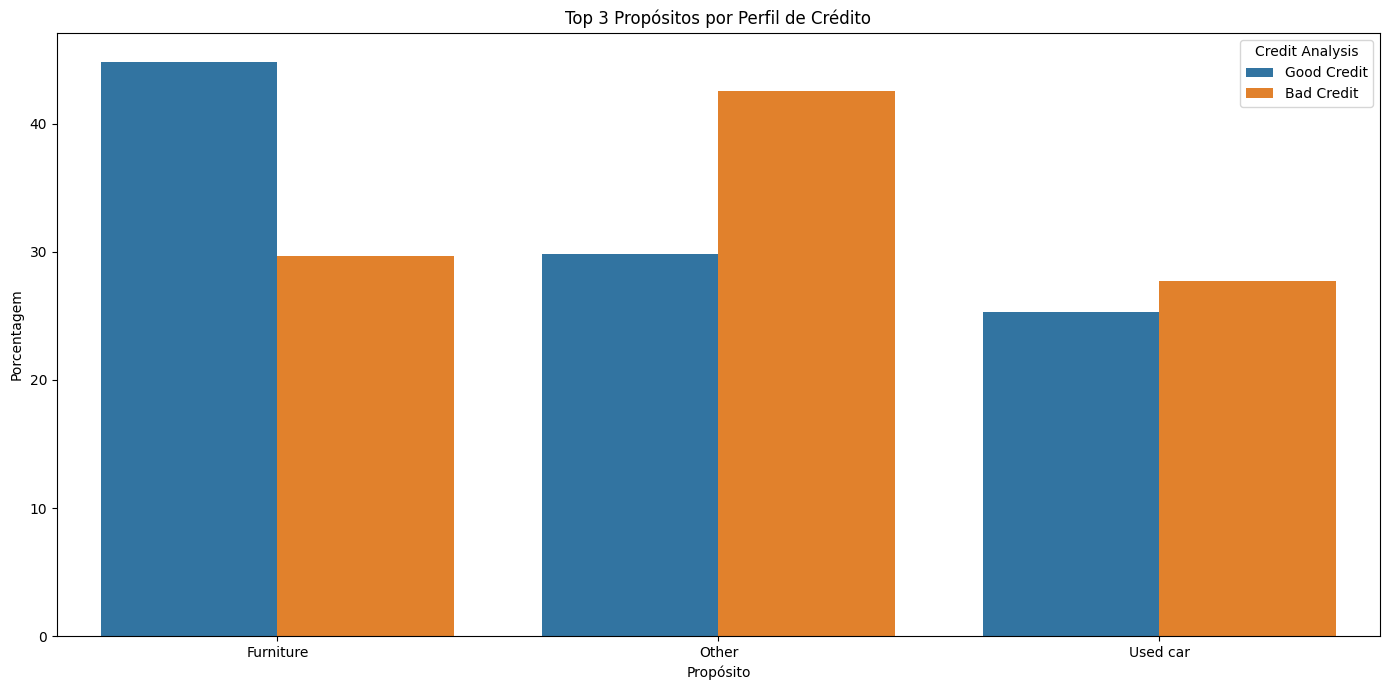

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que df seja o seu DataFrame original
# Filtrar os top 3 propósitos para cada perfil de crédito
top_good_credit = df[df['Credit Analysis'] == 'Good Credit']['Purpose_label'].value_counts().nlargest(3).index
top_bad_credit = df[df['Credit Analysis'] == 'Bad Credit']['Purpose_label'].value_counts().nlargest(3).index

# Criar uma série booleana para identificar as linhas com os propósitos mais comuns por perfil de crédito
top_good_filter = df['Purpose_label'].isin(top_good_credit) & (df['Credit Analysis'] == 'Good Credit')
top_bad_filter = df['Purpose_label'].isin(top_bad_credit) & (df['Credit Analysis'] == 'Bad Credit')

# Filtrar o DataFrame usando a série booleana
top_good_rows = df.loc[top_good_filter]
top_bad_rows = df.loc[top_bad_filter]

# Calcular as porcentagens para o perfil de crédito bom
good_counts = top_good_rows['Purpose_label'].value_counts(normalize=True) * 100
good_percentages_df = good_counts.reset_index()
good_percentages_df.columns = ['Purpose_label', 'Percentage']
good_percentages_df['Credit Analysis'] = 'Good Credit'

# Calcular as porcentagens para o perfil de crédito ruim
bad_counts = top_bad_rows['Purpose_label'].value_counts(normalize=True) * 100
bad_percentages_df = bad_counts.reset_index()
bad_percentages_df.columns = ['Purpose_label', 'Percentage']
bad_percentages_df['Credit Analysis'] = 'Bad Credit'

# Combinar os DataFrames
combined_df = pd.concat([good_percentages_df, bad_percentages_df])

# Gráfico combinado dos top 3 propósitos para perfis de crédito bom e ruim
plt.figure(figsize=(14, 7))
sns.barplot(data=combined_df, x='Purpose_label', y='Percentage', hue='Credit Analysis')
plt.title('Top 3 Propósitos por Perfil de Crédito')
plt.xlabel('Propósito')
plt.ylabel('Porcentagem')

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

> Como é possível notar, o percentual de pessoas com crédito bom que compra móveis é de aproximadamente 10 pontos percentuais acima daqueles com crédito ruim, já o contrário pode ser dito daqueles com outros própositos em mente.

> Uma teoria se forma, pessoas que pegam empréstimos para comprar móveis devem ser mais novas, pois devem estar iniciando sua vida sozihos, vamos ver se isso se comprova nos dados.

Proporção faixa etária

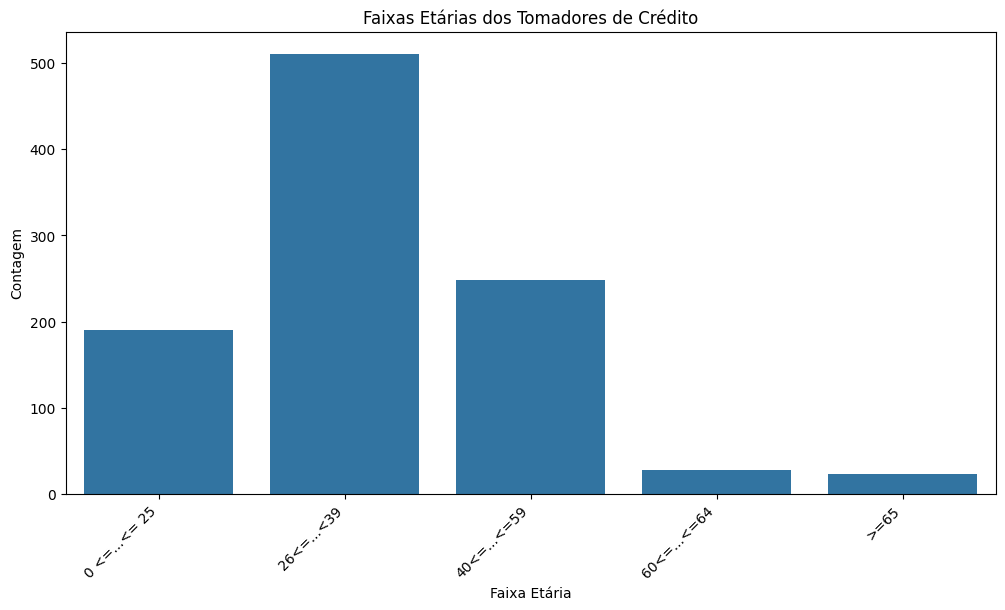

In [54]:
# Gráfico das proporções das faixas etárias na ordem desejada
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Age Group', order=age_labels)
plt.title('Faixas Etárias dos Tomadores de Crédito')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Contagem')
plt.xlabel('Faixa Etária')
plt.show()

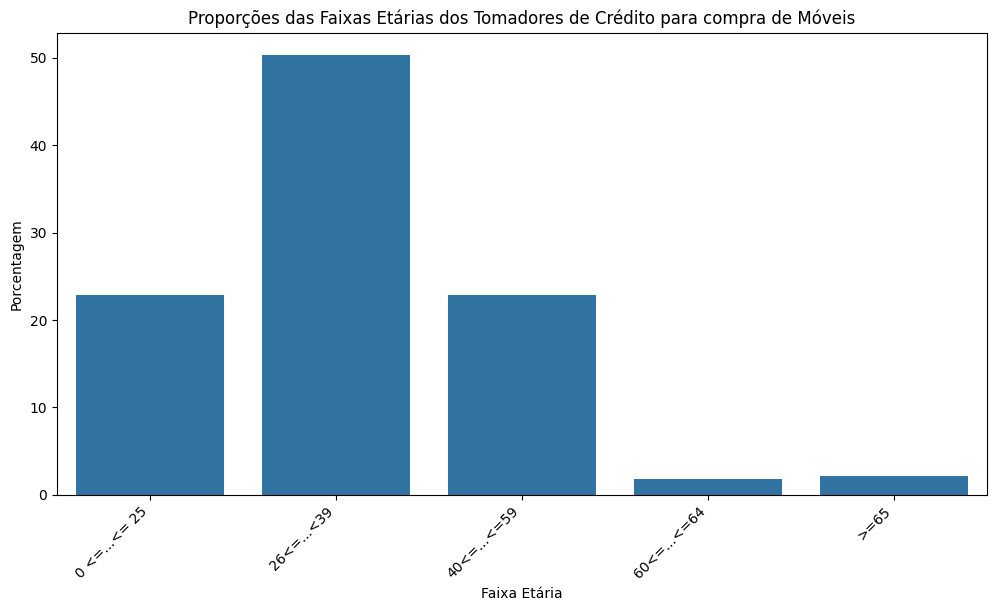

In [53]:
furniture_buyers = df[df['Purpose_label'] == 'Furniture']

# Calcular as porcentagens das faixas etárias
age_group_counts = furniture_buyers['Age Group'].value_counts(normalize=True) * 100
age_group_percentages = age_group_counts.reindex(age_labels).reset_index()
age_group_percentages.columns = ['Age Group', 'Percentage']

# Gráfico das proporções das faixas etárias na ordem desejada
plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_percentages, x='Age Group', y='Percentage', order=age_labels)
plt.title('Proporções das Faixas Etárias dos Tomadores de Crédito para compra de Móveis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Porcentagem')
plt.xlabel('Faixa Etária')
plt.show()

> Como previsto a maior parte dos tomadores de crédito com intuito de comprar móveis estão na faixa etária que compreende a saída da casa dos pais e compra da primeira moradia.

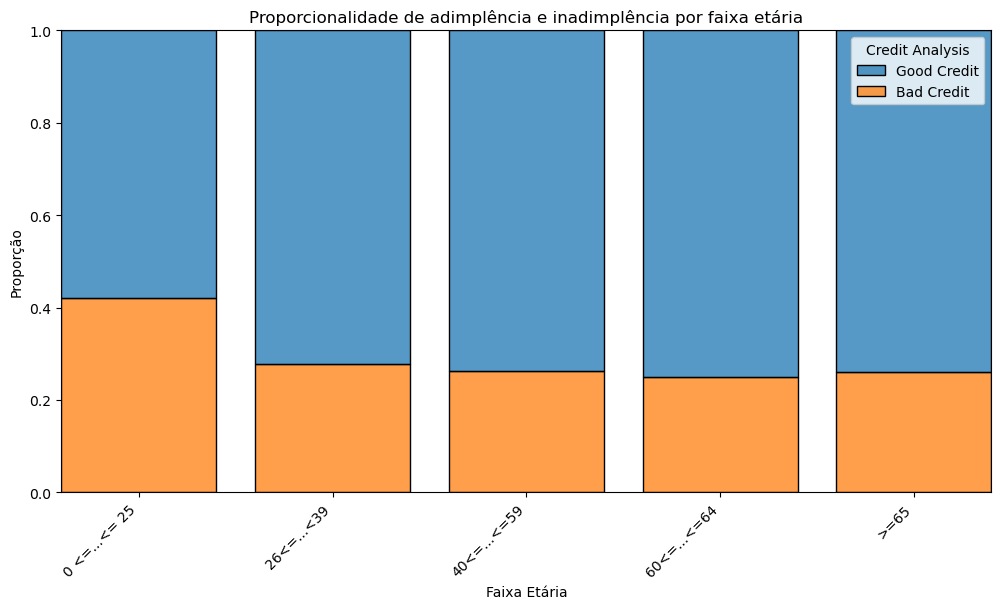

In [64]:
# Comparação proporcional entre adimplentes e inadimplentes por faixa etária
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age Group', hue='Credit Analysis', multiple='fill', shrink=0.8)
plt.title('Proporcionalidade de adimplência e inadimplência por faixa etária')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Proporção')
plt.xlabel('Faixa Etária')
plt.show()


> É interessante notar que a proporção de inadimpência em idades menores é maior, provavelmente resultante de carreiras ainda não bem estabelecidas, algo que conforme aumenta a faixa etária diminui.

> O valor presente nas contas é necessário para saber se a conta já era usada, ou se estava parada, vamos ver como estão as contas dos tomadores de crédito.

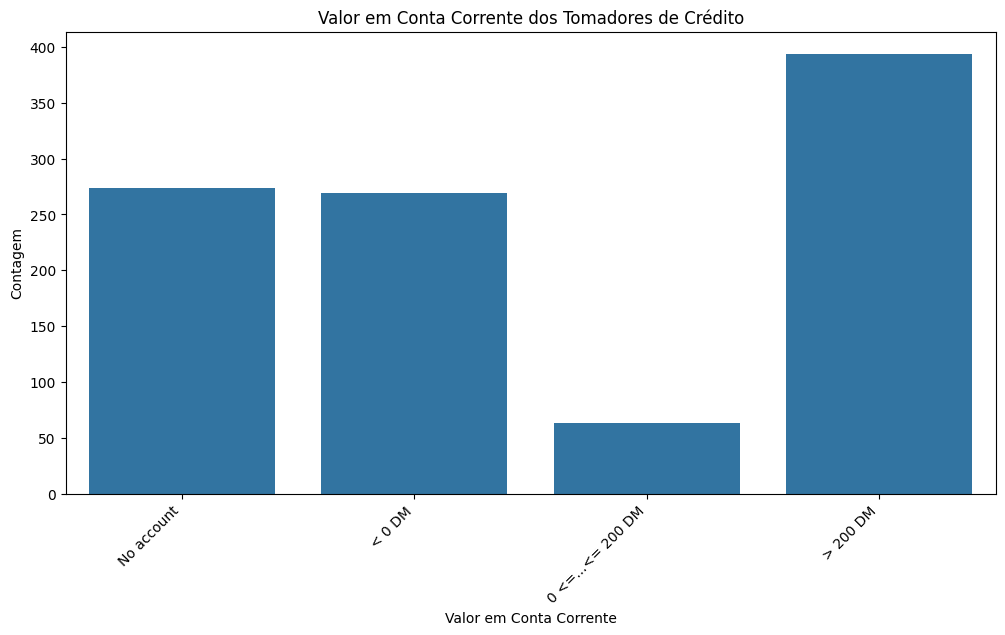

In [59]:
# Gráfico das proporções dos valores em conta corrente na ordem desejada
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Balance', order=balance_labels)
plt.title('Valor em Conta Corrente dos Tomadores de Crédito')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Contagem')
plt.xlabel('Valor em Conta Corrente')
plt.show()

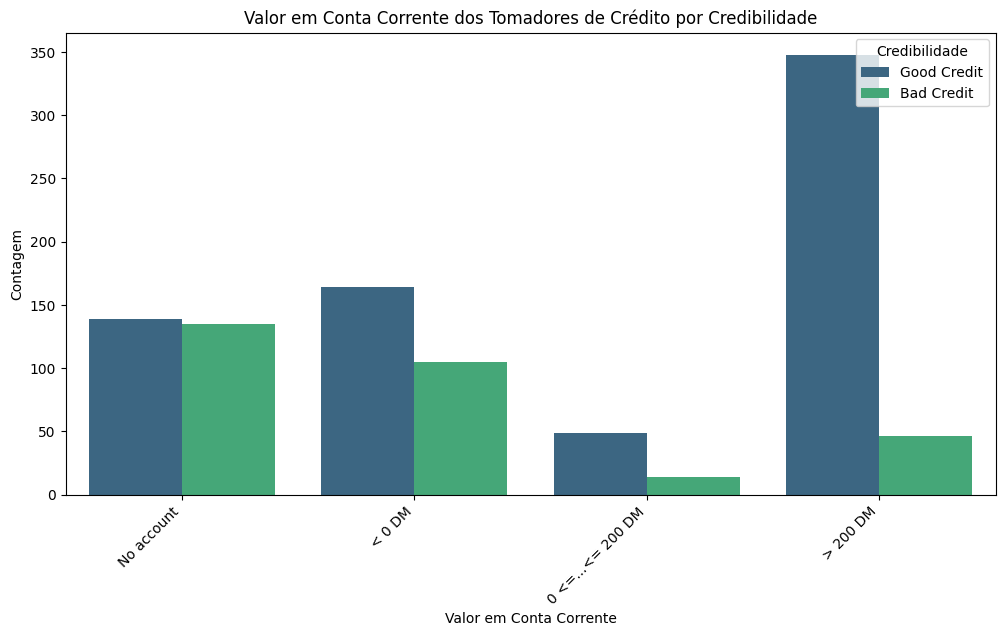

In [63]:
# Gráfico das proporções dos valores em conta corrente na ordem desejada, separado por credibilidade
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Balance', hue='Credit Analysis', order=balance_labels, palette='viridis')
plt.title('Valor em Conta Corrente dos Tomadores de Crédito por Credibilidade')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Contagem')
plt.xlabel('Valor em Conta Corrente')
plt.legend(title='Credibilidade', loc='upper right')
plt.show()

> Como pode ser visto, pessoas que tem dinheiro em conta são muito mais propensas a ter seu crédito aprovado.

## Conclusão
### Conclusão da Análise de Dados sobre o Perfil de Clientes Solicitantes de Empréstimo:

Após análise detalhada do conjunto de dados com o perfil dos clientes que solicitaram empréstimo a um banco alemão, foram observadas as seguintes conclusões:

1. *Perfil dos Solicitantes*:
   - Apenas 30% dos solicitantes são inadimplentes, indicando um retorno financeiro positivo para o banco na maioria dos casos de concessão de empréstimos.
   - A maioria dos solicitantes de empréstimos é do sexo masculino, representando cerca de 90,8% do total, enquanto as mulheres correspondem a 9,2%.

2. *Adimplência por Gênero*:
   - A proporção de adimplentes entre as mulheres é maior do que entre os homens, com 72,83% de adimplentes do sexo feminino em comparação a 69,71% do sexo masculino. Apesar de serem minoria, as mulheres apresentam uma taxa de pagamento superior.

3. *Propósitos de Crédito*:
   - Os três principais propósitos para solicitação de crédito são: Móveis (com a maior taxa), Outros e Carros Usados.
   - Observou-se que, embora os propósitos “Móveis” e “Outros” dominem, a proporção de mulheres que solicitam crédito para móveis é quase o dobro da dos homens. Além disso, a reciclagem supera a compra de carros usados entre as mulheres.

4. *Comparação entre Adimplentes e Inadimplentes*:
   - O percentual de adimplentes que solicitam crédito para móveis é aproximadamente 10 pontos percentuais superior ao dos inadimplentes. Em contraste, a proporção daqueles que solicitam crédito para outros propósitos é maior entre os inadimplentes.

5. *Faixa Etária*:
   - A maioria dos tomadores de crédito com o propósito de compra de móveis está na faixa etária de 26 a 39 anos, uma fase comum para a aquisição de primeira moradia e independência residencial.
   - A proporção de inadimplência é maior entre os mais jovens, o que pode ser atribuído a carreiras ainda não estabilizadas, diminuindo com o avanço da idade.

6. *Saldo em Conta Corrente*:
   - Observou-se que os bons credores tendem a ter um saldo em conta corrente superior a 200 DM (antiga moeda da Alemanha). No entanto, um número considerável de pessoas possui saldo negativo ou sequer tem uma conta corrente ativa.

Essas conclusões fornecem insights valiosos sobre o perfil dos clientes que solicitam empréstimos e podem ajudar o banco a melhorar a avaliação de risco e a tomada de decisão sobre a concessão de crédito. A análise revela padrões interessantes sobre a adimplência e os propósitos de crédito, além de fornecer uma visão sobre a importância do saldo em conta e a faixa etária dos tomadores de empréstimo.